<a href="https://colab.research.google.com/github/xxhyxayxx/ml-dl/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. ダミーデータ生成

- **予測結果（ターゲット）** $ y $
  - これはモデルが予測する値。例えば、家賃予測であれば、$ y $ は家賃の予測額にあたる。

- **入力データ（特徴行列）** $ X $
  - 各データポイントの特徴量（説明変数）を並べた行列。例えば、家賃予測では「部屋の広さ」「部屋数」「築年数」などの特徴を持つデータの行列 $ X $ になる。
  - 各行が1つのデータポイント、各列が1つの特徴に対応している。

$$
X = \begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1n} \\
x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}
$$

- ここで、$ m $ はデータの数（行の数）、$ n $ は特徴の数（列の数）


In [2]:
# データの準備
np.random.seed(0) # コードを再実行しても同じ乱数が出てくるように指定

In [4]:
# 入力データ（特徴行列）Xの作成
X = 2 * np.random.rand(100, 1) # 0から1の間の乱数を100個（1列）生成し、0から2にスケールされ、Xは0から2の間のランダムな数値が入る列ベクトルになる。

In [6]:
# 予測結果（ターゲット）yの作成
y = 4 + 3 * X + np.random.randn(100, 1) # 「4 + 3 * X」 の部分が線形回帰の「真の関係式」で、ここでは切片が4、傾きが3の線形方程式。

# 2. パラメータの初期化

- **重み（回帰係数）** $ w $:
  - 各特徴の「重要度」を表すベクトル。例えば、家賃予測で「部屋の広さ」がより大きく家賃に影響するならば、その特徴に対応する重みは大きな値になる。
  
  $$
  w = \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_n \end{bmatrix}
  $$

- **バイアス（切片）** $ b $:
  - バイアス $ b $ は、回帰直線がグラフの $ y $-軸と交わる位置（オフセット）を表す。

1. **基礎値としての役割**
   - 家賃予測の例を考えると、部屋の広さや部屋数がゼロであっても、立地などの条件で基礎となる家賃が存在する。この「基礎となる家賃」がバイアス $ b $ に相当する。
   - 数式で表すと、特徴量 $ X $ がすべて0のとき、予測値 $ y $ はバイアス $ b $ に等しくなる。

   $$
   y = w \cdot X + b
   $$
2. **グラフでの位置調整**
   - バイアス $ b $ があることで、回帰直線を上下に移動し、データに合った位置に調整することができる。バイアスがなければ、直線は必ず原点を通過する。



In [17]:
w = np.random.randn(X.shape[1], 1) # X の列数に合わせて w を (特徴量の数, 1) にして、X と行列積が取れるように設定する。shapeは配列の行数と列数を知るために使われる。
b = np.random.randn(1) # 標準正規分布に従う乱数を1つ生成し、それをNumPy配列として返す。

式 $ y = Xw + b $ は、入力データ $ X $ に対して重み $ w $ を掛け、さらにバイアス $ b $ を足すことで予測結果 $ y $ を得るという操作を表している。

具体的には、各データポイント $ x_i $ に対応する特徴の重みをかけて足し合わせ、その結果にバイアス $ b $ を加えることで、予測 $ y_i $ を求める。  
たとえば、1つのデータポイント $ x_i $ に対する予測 $ y_i $ は以下のように計算される：

$$
y_i = w_1 \cdot x_{i1} + w_2 \cdot x_{i2} + \dots + w_n \cdot x_{in} + b
$$

### イメージ例
家賃を予測する場合で具体的に見ていく。

- **特徴**：部屋の広さ（平方メートル）、部屋数、築年数
- **入力データ $ X $**：各物件の特徴量データ
  - 例：物件Aが「広さ50㎡、部屋数2、築5年」の場合、$ X $ の一行に $ [50, 2, 5] $ が入る。
- **重み $ w $**：各特徴が家賃に与える影響
  - 例：重みが $ w = [3000, 2000, -500] $ であれば、広さは家賃に正の影響を与え、築年数は負の影響を与えることを意味する。
- **バイアス $ b $**：基礎家賃
  - 例：$ b = 20000 $ なら、家賃の基本料金と考えられる。

この場合、物件Aの家賃予測 $ y $ は次のように計算される：

$$
y = (3000 \times 50) + (2000 \times 2) + (-500 \times 5) + 20000 = 185000
$$

このように、重みやバイアスを設定することで、入力データから目的の予測値が得られるようになる。

In [10]:
learning_rate = 0.1    # 学習率
n_iterations = 1000    # イテレーションの回数
m = len(X)             # データポイントの数

## 1. 学習率（learning_rate）
学習率は、勾配降下法でパラメータ（重みやバイアス）をどれだけ大きく更新するかを決める値。
勾配（コスト関数の傾き）に学習率を掛けることで、1ステップごとの移動量が決まる。
### なぜ0.1なのか？
学習率の値は一般的に0.01〜0.1の間で設定されることが多く、モデルやデータに合わせて調整される。
0.1は適度な値で、多くのケースで安定した学習が得られるため、例として使っている。
学習率が大きすぎると最適な値を飛び越えてしまう可能性があり、小さすぎると収束に時間がかかりすぎる。
## 2. イテレーションの回数（n_iterations）
イテレーションは、パラメータの更新を繰り返す回数。ここでは、勾配降下法を用いて1000回パラメータを更新する。
### なぜ収束するまで繰り返さないのか？
収束判定を加えることもできるが、シンプルな実装ではあらかじめイテレーションの回数を設定していることが多い。
イテレーション回数を決めておけば、計算時間やリソースを制御しやすくなる。実際の学習では、コスト関数の変化が小さくなった時点で早期停止させる方法もあるが、この例では簡便のため1000回で設定している。
## 3. データポイントの数（m）
m = len(X) によって、データポイントの数を X の行数から取得する。
今回の場合はX が100行であるため、データポイントの数 m は100。

In [14]:
# コスト履歴を保存するリスト
cost_history = [] # モデルが学習する過程でコストがどのように変化していくかを追跡し、収束状況を確認するため

# 3. コスト関数
二乗誤差のコスト関数は以下の式で表される：

$$
J(w, b) = \frac{1}{2m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

この式にはいくつかのポイントがあり、特に二乗和を使うことにはいくつかの理由がある。

### 1. 二乗誤差の利用
二乗誤差では、各データポイントの誤差（実際の値と予測された値の差）を2乗することが行われている。これにより次のような利点が得られる。

- **誤差の符号を無視できる**：
  誤差を2乗すると、誤差が正でも負でも結果は正の値になる。つまり、予測が実際の値よりも大きすぎても小さすぎても、そのズレを同じように捉えることができる。

- **大きな誤差に対してペナルティを与える**：
  誤差を2乗することで、大きな誤差がさらに大きくなる。これにより、大きな誤差が生じるデータポイントに対して強いペナルティが与えられ、モデルができるだけすべてのデータに適合するように学習する。

#### 具体例
以下のような実際の値（$ y $）と予測値（$\hat{y}$）があるとする。

- 実際の値： $ y = 100 $
- ケース1：予測値が大きすぎる場合（過大予測） $\hat{y}_1 = 110$
- ケース2：予測値が小さすぎる場合（過小予測） $\hat{y}_2 = 90$

それぞれのケースで、予測誤差を計算してみる。

##### ケース1：過大予測（予測値が実際よりも大きい）
- 誤差：$ e_1 = y - \hat{y}_1 = 100 - 110 = -10 $
- 二乗誤差：$ e_1^2 = (-10)^2 = 100 $

##### ケース2：過小予測（予測値が実際よりも小さい）
- 誤差：$ e_2 = y - \hat{y}_2 = 100 - 90 = 10 $
- 二乗誤差：$ e_2^2 = 10^2 = 100 $

このように、過大予測（誤差が負）でも過小予測（誤差が正）でも、二乗誤差は常に正の値（ここでは100）になる。つまり、二乗誤差を使うことで、誤差の符号を無視し、誤差の大きさのみを捉えることができる。これにより、モデルが目指すのは誤差の絶対的な大きさを最小化することで、過大予測と過小予測が等しく扱われる。
「100」という数値は、単に「予測と実際の値の差を2乗したもの」であり、誤差が実際の値とどうずれているかの指標にはなりますが、誤差そのものを意味するわけではありません。これは「誤差の大きさを強調するために2乗した結果」です。

### 2. なぜ「平均」をとるのか？
全データに対して平均誤差を使うことで、データセット全体での「典型的な」誤差の大きさを把握できる。つまり、モデルの全体的な性能を判断する指標として使える。

### 3. なぜ $\frac{1}{2}$ を使うのか？
この係数 $\frac{1}{2}$ は計算の便宜のために使われる。具体的には、後で勾配降下法を使ってコスト関数を最小化するときに、この係数があることで微分の際に $2$ が打ち消され、数式が簡潔になる。

## 具体的な計算手順

1. **個々の誤差の計算**：
   各データポイントについて、予測値と実際の値の誤差を計算。
   
   $$
   e_i = y_i - \hat{y}_i
   $$

2. **誤差の二乗**：
   各誤差を2乗して二乗誤差を求める。
   
   $$
   e_i^2 = (y_i - \hat{y}_i)^2
   $$

3. **二乗誤差の合計**：
   すべてのデータポイントの二乗誤差を合計する。データポイントの数を $ m $ とすると、二乗誤差の合計は次のように表される。
   
   $$
   \sum_{i=1}^m e_i^2 = \sum_{i=1}^m (y_i - \hat{y}_i)^2
   $$

4. **二乗誤差の平均をとる**：
   データ全体の典型的な誤差の大きさを把握するために、合計した二乗誤差をデータポイントの数 $ m $ で割る。
   
   $$
   \text{MSE} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
   $$

こうすることで、データセット全体の誤差の大きさを1つの数値で表すことができ、モデルの予測精度を総合的に評価できる。

### 微分の計算
例えば、元々のコスト関数が以下のように定義されているとする（$ m = 1 $ の場合）：

$$
J(w) = (y - \hat{y})^2 = (y - (wx + b))^2
$$

これを $ w $ に関して微分してみます。

1. **二乗項の微分**：
   二乗項 $(y - (wx + b))^2$ を微分すると「外側の関数（2乗）」の微分によって「2」が現れる。
   
   $$
   \frac{dJ}{dw} = 2 \cdot (y - (wx + b)) \cdot \frac{d}{dw} (y - (wx + b))
   $$

2. **内側の微分**：
   $(y - (wx + b))$ を $ w $ に関して微分すると、結果は $ -x $ になる。
   
   $$
   \frac{dJ}{dw} = 2 \cdot (y - (wx + b)) \cdot (-x)
   $$

3. **整理**：
   結果として以下のような式になる。
   
   $$
   \frac{dJ}{dw} = -2x \cdot (y - \hat{y})
   $$

このように、「2」が現れるため、最初にコスト関数に $ \frac{1}{2} $ をかけておくことで、微分結果から「2」を消し、計算が簡潔になる。

コスト関数に $ \frac{1}{2} $ の係数を含めた形で定義すると以下のようになる：

$$
J(w) = \frac{1}{2} (y - \hat{y})^2
$$

この状態で微分すると、

$$
\frac{dJ}{dw} = \frac{1}{2} \cdot 2(y - \hat{y})(-x) = (y - \hat{y})(-x)
$$

こうして、微分結果から「2」が消え、計算がシンプルになる。

微分で得た**勾配（傾き）**を使って、パラメータ
𝑤
 と
𝑏
 を少しずつ更新していくことで、コスト関数を最小化していく。この繰り返しによって、モデルが最も適したパラメータを見つけ出し、予測精度を向上させることができる。

1. コスト関数の微分で傾き（勾配）を求める。
2. その傾きの方向に向かってパラメータを調整（例えば、右下がりなら「右に移動する」イメージで）。
3. 更新後のパラメータで再度コスト関数を評価し、傾きを求め直してさらに調整。

こうして少しずつ最適解に近づき、最終的にコストが最小になる地点（理想的なパラメータ値）を探し当てる。

In [18]:
# 勾配降下法
for i in range(n_iterations):
    # 予測値
    y_pred = X.dot(w) + b # X.dot(w) は行列積の操作で、特徴行列 X と重みベクトル w を掛け算している。行列積を用いることで、全データポイントの予測を一度に計算できる。

    # コスト関数（平均二乗誤差）
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    cost_history.append(cost)

    # 勾配の計算
    dw = (1 / m) * np.dot(X.T, (y_pred - y))
    db = (1 / m) * np.sum(y_pred - y)

    # パラメータの更新
    w -= learning_rate * dw
    b -= learning_rate * db

    # 100回ごとにコストを出力
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost}, w = {w[0]}, b = {b[0]}")

Iteration 0: Cost = 17.35177742059252, w = [1.59327679], b = 0.910964892480979
Iteration 100: Cost = 0.5060386080827464, w = [3.10566912], b = 3.7102493961668572
Iteration 200: Cost = 0.49455559157466483, w = [2.90704651], b = 3.9524499038148426
Iteration 300: Cost = 0.49378032136366146, w = [2.85543729], b = 4.015382203621391
Iteration 400: Cost = 0.4937279793767239, w = [2.84202738], b = 4.031734251755233
Iteration 500: Cost = 0.4937244455332231, w = [2.83854301], b = 4.035983095020033
Iteration 600: Cost = 0.4937242069475174, w = [2.83763765], b = 4.037087095506153
Iteration 700: Cost = 0.4937241908395209, w = [2.8374024], b = 4.037373954069154
Iteration 800: Cost = 0.4937241897519974, w = [2.83734128], b = 4.037448490118912
Iteration 900: Cost = 0.49372418967857395, w = [2.83732539], b = 4.037467857233686


### 1. 重み $ w $ に対する勾配 $ dw $

$$
dw = \frac{1}{m} \cdot X^T \cdot (y_{\text{pred}} - y)
$$

- **目的**：$ dw $ は、**コスト関数を重み $ w $ で微分**したもの。これにより、勾配降下法で重みをどの方向にどれだけ調整するかがわかる。
- **具体的な計算**：
  - $ y_{\text{pred}} - y $：予測値 $ y_{\text{pred}} $ と実際の値 $ y $ の差（誤差）を計算。これは、各データポイントで予測がどれだけずれているかを示す。
  - $ X^T $：入力データ行列 $ X $ の転置。これにより、各特徴の誤差への寄与を考慮できるようになる。
  - $ X^T \cdot (y_{\text{pred}} - y) $：$ X^T $ と $ y_{\text{pred}} - y $ のドット積をとることで、各特徴量に対する勾配を計算。
  - $ \frac{1}{m} $：全データポイントに対する平均を取るために、データ数 $ m $ で割る。

### 2. バイアス $ b $ に対する勾配 $ db $

$$
db = \frac{1}{m} \sum (y_{\text{pred}} - y)
$$

- **目的**：$ db $ は、**コスト関数をバイアス $ b $ で微分**したもの。
- **具体的な計算**：
  - $ \sum (y_{\text{pred}} - y) $：予測誤差の合計を計算。バイアス $ b $ は、全ての予測値に一律で影響を与えるため、全てのデータポイントでの誤差の平均が必要。
  - $ \frac{1}{m} $：データポイント数 $ m $ で割って、全体の平均誤差を求める。

この2つの勾配（$ dw $ と $ db $）を用いて、重み $ w $ とバイアス $ b $ を調整し、コスト関数を最小化する。

### 3. Xの転置

`X.T`で`X`の転置が必要なのは、行列の形状を合わせるため。具体的には、勾配 $dw$ を計算するときに、各特徴量に対して誤差を適切に掛け合わせるために、転置を使う。

1. **元の形状**：
   - $X$ の形状は $(m, n)$ で、$m$ はデータポイント（サンプル）数、$n$ は特徴量の数。
   - $y_{\text{pred}} - y$ の形状は $(m, 1)$ で、各データポイントに対する誤差を表している。

2. **勾配の計算での行列積**：
   - 勾配 $dw$ を計算する際、各特徴量ごとに誤差の影響を計算するため、$X$ の転置が必要になる。
   - $X^T$ の形状は $(n, m)$ となり、$y_{\text{pred}} - y$ と行列積を取ることで、結果の形状が $(n, 1)$ になる。
   - これは $w$ の形状 $(n, 1)$ に対応しており、重みベクトルと勾配の形状が一致する。

### 行列積の具体例

たとえば、$X$ が以下のような場合を考えてみる（簡単のために $m = 2$, $n = 3$ ）：

$$
X = \begin{bmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{23} \end{bmatrix}
$$

これを転置すると：

$$
X^T = \begin{bmatrix} x_{11} & x_{21} \\ x_{12} & x_{22} \\ x_{13} & x_{23} \end{bmatrix}
$$

これで $X^T$ と $y_{\text{pred}} - y$ の形状が適切になり、行列積を取ることで、特徴ごとの勾配が得られるようになる。




Final parameters: w = [2.83732129], b = 4.037472865528924
Final Cost = 0.4937241896736266


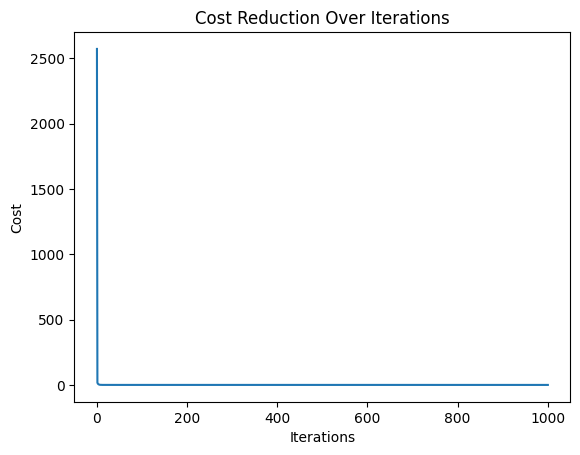

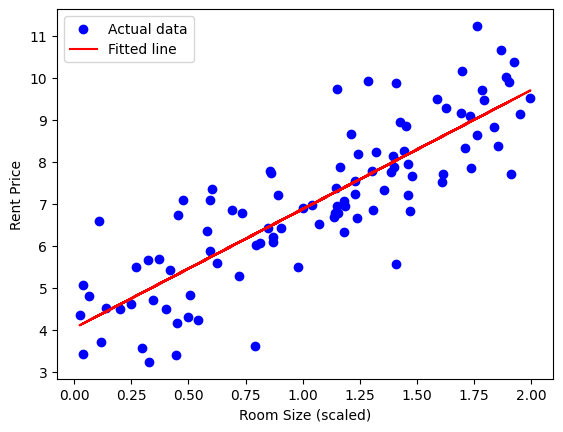

In [19]:
# 結果の表示
print(f"\nFinal parameters: w = {w[0]}, b = {b[0]}")
print(f"Final Cost = {cost}")

# コストの推移をプロット
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.show()

# データとモデルの予測をプロット
plt.scatter(X, y, color="blue", label="Actual data")
plt.plot(X, X.dot(w) + b, color="red", label="Fitted line")
plt.xlabel("Room Size (scaled)")
plt.ylabel("Rent Price")
plt.legend()
plt.show()